# Sample Notebook Using DenseNet (a pre-trained model) comparing MDF and Pytorch model

### 1. Import all important libraries

* **torch**: the PyTorch deep learning framework.
* **torch.nn**: the neural network module of PyTorch.
* **torchvision.models**: a PyTorch library with pre-trained models for computer vision tasks.
* **torchvision.transforms**: a PyTorch library with image transformations for data augmentation and preprocessing.
* **PIL.Image**: the Python Imaging Library for working with images.
* **numpy**: a Python library for working with numerical data.
* **ast**: a Python library for parsing strings as Python code.
* **modeci_mdf.execution_engine**: the execution engine of the Modeci MDF package.
* **modeci_mdf.interfaces.pytorch**: the PyTorch interface of the Modeci MDF package

In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import ast
from modeci_mdf.execution_engine import EvaluableGraph
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf

### 2. Preprocess the input image

In [3]:
def image_loader(image_path):
    # Define transformation pipeline
    loader = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])
    # Open image using PIL
    image = Image.open(image_path)
    # Apply transformation pipeline to image
    image = loader(image).float()
    # Convert image tensor to float data type
    image = image.float()
    # Add batch dimension to the tensor by unsqueezing it along the 0th dimension
    image = image.unsqueeze(0)
    # Return preprocessed image tensor
    return image

### 3. Load pretrained DenseNet Model

In [4]:
# Load a pre-trained model
model = models.densenet121(pretrained=True)

# Set the model to evaluation mode
model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### Load the labels

In [6]:
# Load the ImageNet labels from the file
with open('imagenet_labels.txt') as f:
    labels = ast.literal_eval(f.read())

In [7]:
# Load and preprocess the input image
input_image = image_loader("pytorch_example_images/a/img5.jpeg")

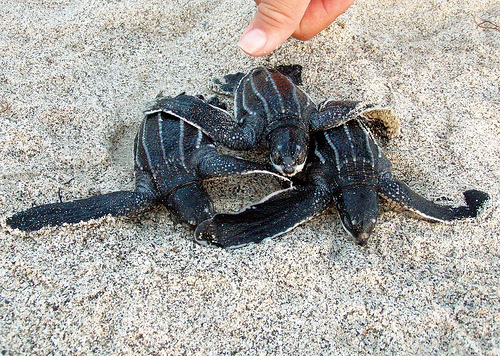

In [9]:
display(Image.open("pytorch_example_images/a/img5.jpeg"))

In [10]:
# Get the model output and predicted label
output = model(input_image)
_, pred_label = torch.max(output.data, 1)

In [ ]:
# Print the predicted label and corresponding ImageNet label
print("Predicted Label:", pred_label.item())
print("ImageNet Label:", labels[pred_label.item()])